In [1]:
import scipy
import numpy
import matplotlib
import pandas
import sklearn
import pydot
import h5py

import theano
import tensorflow
import keras

print('scipy ' + scipy.__version__)
print('numpy ' + numpy.__version__)
print('matplotlib ' + matplotlib.__version__)
print('pandas ' + pandas.__version__)
print('sklearn ' + sklearn.__version__)
print('pydot ' + pydot.__version__)
print('h5py ' + h5py.__version__)

print('theano ' + theano.__version__)
print('tensorflow ' + tensorflow.__version__)
print('keras ' + keras.__version__)

/Users/hoondori/pyenv/myenv/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
/Users/hoondori/pyenv/myenv/lib/python3.6/importlib/_bootstrap.py:205: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


scipy 1.0.0
numpy 1.14.0
matplotlib 2.1.1
pandas 0.22.0
sklearn 0.19.1
pydot 1.2.4
h5py 2.7.1
theano 1.0.1
tensorflow 1.4.1
keras 2.1.2


Using TensorFlow backend.


# MNIST by keras

In [2]:
from keras.utils import np_utils
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Activation

(X_train, Y_train), (X_test, Y_test) = mnist.load_data()
X_val = X_train[50000:]
Y_val = Y_train[50000:]
X_train = X_train[:50000]
Y_train = Y_train[:50000]

X_train = X_train.reshape(50000,784).astype('float32') / 255.0
X_val = X_val.reshape(10000,784).astype('float32') / 255.0
X_test = X_test.reshape(10000,784).astype('float32') / 255.0

Y_train = np_utils.to_categorical(Y_train)
Y_val = np_utils.to_categorical(Y_val)
Y_test = np_utils.to_categorical(Y_test)

model = Sequential()
model.add(Dense(units=64, input_dim=28*28, activation='relu'))
model.add(Dense(units=10, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

# 텐서보드와 연동 콜백
tb_hist = keras.callbacks.TensorBoard(log_dir='./graph', histogram_freq=0, write_graph=True,
                                     write_images=True)

# 조기 종료 콜백
from keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(patience = 20)

hist = model.fit(X_train, Y_train, epochs=1000, batch_size=32,
                 validation_data=(X_val, Y_val), callbacks=[tb_hist,early_stopping])

loss_and_metrics = model.evaluate(X_test, Y_test, batch_size=32)

print('loss_and_metrics : ' + str(loss_and_metrics))

Train on 50000 samples, validate on 10000 samples
Epoch 1/1000
50000/50000 [==============================] - 5s 98us/step - loss: 0.7688 - acc: 0.8020 - val_loss: 0.3813 - val_acc: 0.9003
Epoch 2/1000
50000/50000 [==============================] - 5s 105us/step - loss: 0.3742 - acc: 0.8963 - val_loss: 0.3098 - val_acc: 0.9135
Epoch 3/1000
50000/50000 [==============================] - 5s 97us/step - loss: 0.3198 - acc: 0.9102 - val_loss: 0.2803 - val_acc: 0.9221
Epoch 4/1000
50000/50000 [==============================] - 5s 101us/step - loss: 0.2893 - acc: 0.9192 - val_loss: 0.2575 - val_acc: 0.9285
Epoch 5/1000
50000/50000 [==============================] - 5s 98us/step - loss: 0.2670 - acc: 0.9251 - val_loss: 0.2400 - val_acc: 0.9325
Epoch 6/1000
50000/50000 [==============================] - 5s 92us/step - loss: 0.2494 - acc: 0.9299 - val_loss: 0.2271 - val_acc: 0.9382
Epoch 7/1000
50000/50000 [==============================] - 5s 98us/step - loss: 0.2343 - acc: 0.9345 - val_loss: 

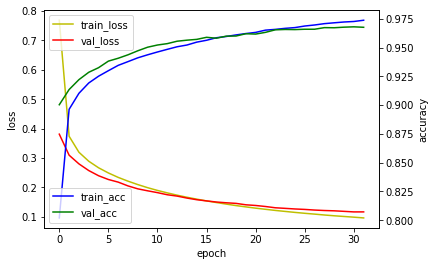

In [4]:
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots()
acc_ax = loss_ax.twinx()

loss_ax.plot(hist.history['loss'],'y', label='train_loss')
loss_ax.plot(hist.history['val_loss'],'r', label='val_loss')
acc_ax.plot(hist.history['acc'],'b', label='train_acc')
acc_ax.plot(hist.history['val_acc'],'g', label='val_acc')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuracy')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

plt.show()

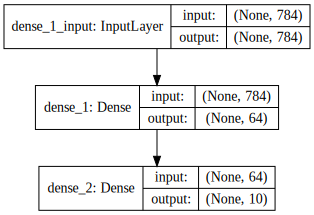

In [5]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

%matplotlib inline

SVG(model_to_dot(model,show_shapes=True).create(prog='dot', format='svg'))

In [6]:
from keras.utils import plot_model
plot_model(model, to_file='model.png')

In [7]:
# 딥러닝 모델 저장 기능 확인

from keras.models import load_model
model.save('mnist_mlp_model.h5')
model = load_model('mnist_mlp_model.h5')

In [13]:
# prediction

import numpy as np 

xhat_idx = np.random.choice(X_test.shape[0], 5)
xhat = X_test[xhat_idx]
yhat = model.predict_classes(xhat)

for i in range(5):
    print('True : ' + str(np.argmax(Y_test[xhat_idx[i]])) + ',Predict :' + str(yhat[i]))


True : 1,Predict :1
True : 5,Predict :5
True : 2,Predict :2
True : 1,Predict :1
True : 5,Predict :5
